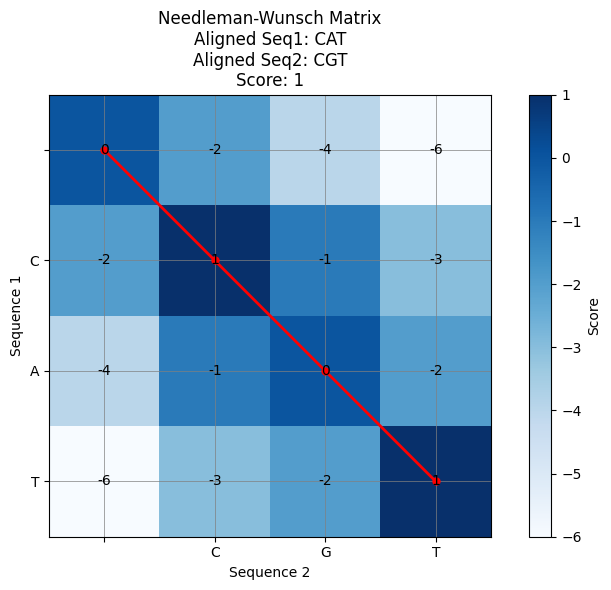

Aligned seq1: CAT
Aligned seq2: CGT
Score: 1


In [1]:
import matplotlib.pyplot as plt
import numpy as np

def needleman_wunsch(seq1, seq2, match=1, mismatch=-1, gap=-2):
    # Initialize the scoring matrix
    rows, cols = len(seq1) + 1, len(seq2) + 1
    matrix = [[0 for _ in range(cols)] for _ in range(rows)]

    # Fill first row and column with gap penalties
    for i in range(rows):
        matrix[i][0] = i * gap
    for j in range(cols):
        matrix[0][j] = j * gap

    # Fill the scoring matrix
    for i in range(1, rows):
        for j in range(1, cols):
            match_score = match if seq1[i-1] == seq2[j-1] else mismatch
            diagonal = matrix[i-1][j-1] + match_score  # Match/mismatch
            vertical = matrix[i-1][j] + gap            # Gap in seq2
            horizontal = matrix[i][j-1] + gap          # Gap in seq1
            matrix[i][j] = max(diagonal, vertical, horizontal)

    # Traceback with path tracking
    aligned1, aligned2 = [], []
    path = [(len(seq1), len(seq2))]  # Store path for visualization
    i, j = len(seq1), len(seq2)
    while i > 0 or j > 0:
        if i > 0 and j > 0 and matrix[i][j] == matrix[i-1][j-1] + (match if seq1[i-1] == seq2[j-1] else mismatch):
            aligned1.append(seq1[i-1])
            aligned2.append(seq2[j-1])
            i -= 1
            j -= 1
        elif i > 0 and matrix[i][j] == matrix[i-1][j] + gap:
            aligned1.append(seq1[i-1])
            aligned2.append('-')
            i -= 1
        else:
            aligned1.append('-')
            aligned2.append(seq2[j-1])
            j -= 1
        path.append((i, j))  # Record each step

    # Reverse sequences
    aligned1 = ''.join(reversed(aligned1))
    aligned2 = ''.join(reversed(aligned2))
    score = matrix[len(seq1)][len(seq2)]

    # Visualization
    visualize_matrix(seq1, seq2, matrix, path, aligned1, aligned2, score)

    return aligned1, aligned2, score

def visualize_matrix(seq1, seq2, matrix, path, aligned1, aligned2, score):
    # Convert matrix to numpy array for plotting
    matrix_np = np.array(matrix)

    # Create heatmap
    plt.figure(figsize=(8, 6))
    plt.imshow(matrix_np, cmap='Blues', interpolation='nearest')
    plt.colorbar(label='Score')

    # Add grid lines
    plt.grid(which='major', color='gray', linestyle='-', linewidth=0.5)

    # Label axes with sequences
    plt.xticks(np.arange(len(seq2) + 1), [''] + list(seq2), rotation=0)
    plt.yticks(np.arange(len(seq1) + 1), [''] + list(seq1))
    plt.xlabel('Sequence 2')
    plt.ylabel('Sequence 1')

    # Annotate matrix with scores
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            plt.text(j, i, str(matrix[i][j]), ha='center', va='center', color='black')

    # Plot the traceback path
    path_x = [p[1] for p in path]  # Column indices
    path_y = [p[0] for p in path]  # Row indices
    plt.plot(path_x, path_y, color='red', linewidth=2, marker='o', markersize=5)

    # Title with alignment result
    plt.title(f'Needleman-Wunsch Matrix\nAligned Seq1: {aligned1}\nAligned Seq2: {aligned2}\nScore: {score}')

    # Show plot
    plt.tight_layout()
    plt.show()

# Example usage
seq1 = "CAT"
seq2 = "CGT"
aligned1, aligned2, score = needleman_wunsch(seq1, seq2)
print(f"Aligned seq1: {aligned1}")
print(f"Aligned seq2: {aligned2}")
print(f"Score: {score}")

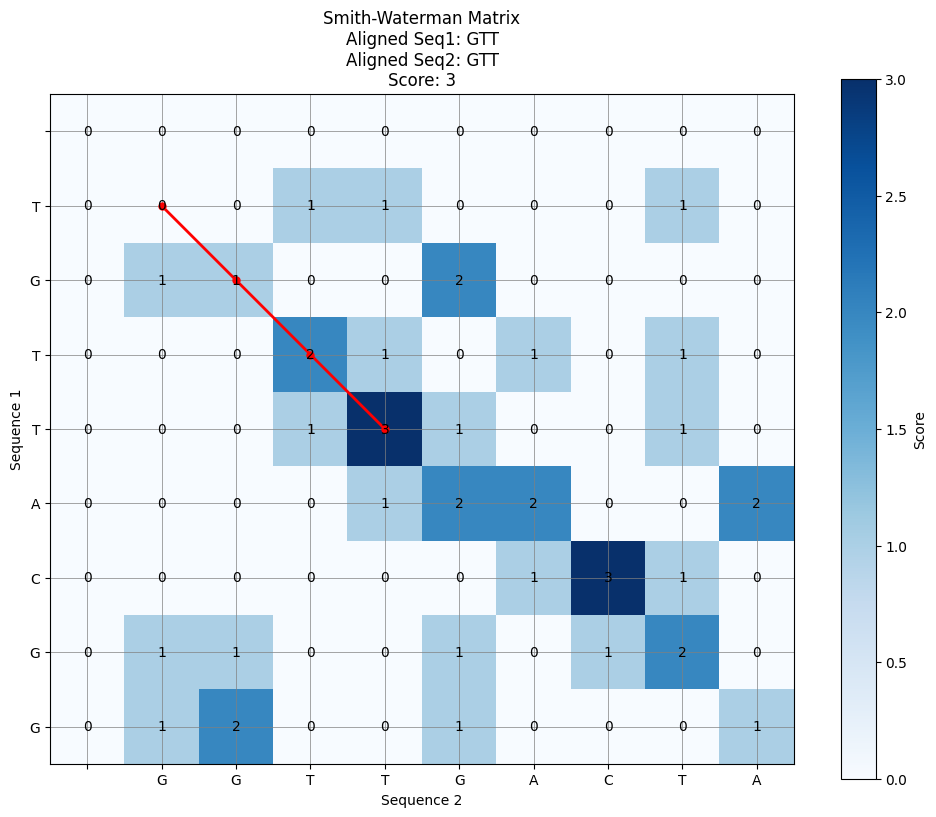

Aligned seq1: GTT
Aligned seq2: GTT
Score: 3


In [2]:
import matplotlib.pyplot as plt
import numpy as np

def smith_waterman(seq1, seq2, match=1, mismatch=-1, gap=-2):
    # Initialize the scoring matrix with zeros
    rows, cols = len(seq1) + 1, len(seq2) + 1
    matrix = [[0 for _ in range(cols)] for _ in range(rows)]

    # Track the maximum score and its position for traceback
    max_score = 0
    max_pos = (0, 0)

    # Fill the scoring matrix
    for i in range(1, rows):
        for j in range(1, cols):
            match_score = match if seq1[i-1] == seq2[j-1] else mismatch
            diagonal = matrix[i-1][j-1] + match_score  # Match/mismatch
            vertical = matrix[i-1][j] + gap            # Gap in seq2
            horizontal = matrix[i][j-1] + gap          # Gap in seq1
            matrix[i][j] = max(0, diagonal, vertical, horizontal)  # Reset to 0 if negative
            if matrix[i][j] > max_score:
                max_score = matrix[i][j]
                max_pos = (i, j)

    # Traceback from the max score position with path tracking
    aligned1, aligned2 = [], []
    path = [max_pos]  # Store path for visualization
    i, j = max_pos
    while i > 0 and j > 0 and matrix[i][j] > 0:
        if matrix[i][j] == matrix[i-1][j-1] + (match if seq1[i-1] == seq2[j-1] else mismatch):
            aligned1.append(seq1[i-1])
            aligned2.append(seq2[j-1])
            i -= 1
            j -= 1
        elif matrix[i][j] == matrix[i-1][j] + gap:
            aligned1.append(seq1[i-1])
            aligned2.append('-')
            i -= 1
        else:
            aligned1.append('-')
            aligned2.append(seq2[j-1])
            j -= 1
        path.append((i, j))  # Record each step

    # Reverse the sequences
    aligned1 = ''.join(reversed(aligned1))
    aligned2 = ''.join(reversed(aligned2))

    # Visualization
    visualize_matrix(seq1, seq2, matrix, path, aligned1, aligned2, max_score)

    return aligned1, aligned2, max_score

def visualize_matrix(seq1, seq2, matrix, path, aligned1, aligned2, score):
    # Convert matrix to numpy array for plotting
    matrix_np = np.array(matrix)

    # Create heatmap
    plt.figure(figsize=(10, 8))
    plt.imshow(matrix_np, cmap='Blues', interpolation='nearest')
    plt.colorbar(label='Score')

    # Add grid lines
    plt.grid(which='major', color='gray', linestyle='-', linewidth=0.5)

    # Label axes with sequences
    plt.xticks(np.arange(len(seq2) + 1), [''] + list(seq2), rotation=0)
    plt.yticks(np.arange(len(seq1) + 1), [''] + list(seq1))
    plt.xlabel('Sequence 2')
    plt.ylabel('Sequence 1')

    # Annotate matrix with scores
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            plt.text(j, i, str(matrix[i][j]), ha='center', va='center', color='black')

    # Plot the traceback path
    path_x = [p[1] for p in path]  # Column indices
    path_y = [p[0] for p in path]  # Row indices
    plt.plot(path_x, path_y, color='red', linewidth=2, marker='o', markersize=5)

    # Title with alignment result
    plt.title(f'Smith-Waterman Matrix\nAligned Seq1: {aligned1}\nAligned Seq2: {aligned2}\nScore: {score}')

    # Show plot
    plt.tight_layout()
    plt.show()

# Example usage
seq1 = "TGTTACGG"
seq2 = "GGTTGACTA"
aligned1, aligned2, score = smith_waterman(seq1, seq2)
print(f"Aligned seq1: {aligned1}")
print(f"Aligned seq2: {aligned2}")
print(f"Score: {score}")


Needleman-Wunsch Result:
Aligned seq1: TGTT-ACGG
Aligned seq2: GGTTGACTA
Score: 0

Smith-Waterman Result:
Aligned seq1: GTT
Aligned seq2: GTT
Score: 3


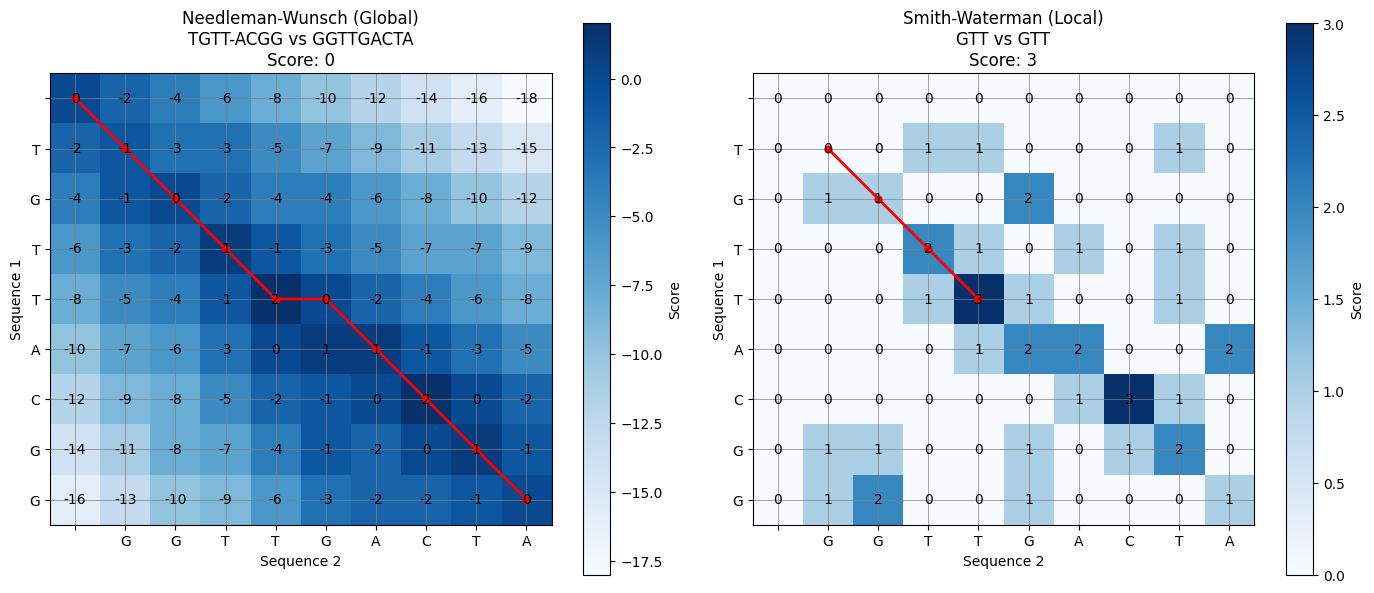

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def needleman_wunsch(seq1, seq2, match=1, mismatch=-1, gap=-2):
    rows, cols = len(seq1) + 1, len(seq2) + 1
    matrix = [[0 for _ in range(cols)] for _ in range(rows)]
    for i in range(rows):
        matrix[i][0] = i * gap
    for j in range(cols):
        matrix[0][j] = j * gap
    for i in range(1, rows):
        for j in range(1, cols):
            match_score = match if seq1[i-1] == seq2[j-1] else mismatch
            diagonal = matrix[i-1][j-1] + match_score
            vertical = matrix[i-1][j] + gap
            horizontal = matrix[i][j-1] + gap
            matrix[i][j] = max(diagonal, vertical, horizontal)

    aligned1, aligned2 = [], []
    path = [(len(seq1), len(seq2))]
    i, j = len(seq1), len(seq2)
    while i > 0 or j > 0:
        if i > 0 and j > 0 and matrix[i][j] == matrix[i-1][j-1] + (match if seq1[i-1] == seq2[j-1] else mismatch):
            aligned1.append(seq1[i-1])
            aligned2.append(seq2[j-1])
            i -= 1
            j -= 1
        elif i > 0 and matrix[i][j] == matrix[i-1][j] + gap:
            aligned1.append(seq1[i-1])
            aligned2.append('-')
            i -= 1
        else:
            aligned1.append('-')
            aligned2.append(seq2[j-1])
            j -= 1
        path.append((i, j))

    aligned1 = ''.join(reversed(aligned1))
    aligned2 = ''.join(reversed(aligned2))
    return aligned1, aligned2, matrix[len(seq1)][len(seq2)], matrix, path

def smith_waterman(seq1, seq2, match=1, mismatch=-1, gap=-2):
    rows, cols = len(seq1) + 1, len(seq2) + 1
    matrix = [[0 for _ in range(cols)] for _ in range(rows)]
    max_score = 0
    max_pos = (0, 0)
    for i in range(1, rows):
        for j in range(1, cols):
            match_score = match if seq1[i-1] == seq2[j-1] else mismatch
            diagonal = matrix[i-1][j-1] + match_score
            vertical = matrix[i-1][j] + gap
            horizontal = matrix[i][j-1] + gap
            matrix[i][j] = max(0, diagonal, vertical, horizontal)
            if matrix[i][j] > max_score:
                max_score = matrix[i][j]
                max_pos = (i, j)

    aligned1, aligned2 = [], []
    path = [max_pos]
    i, j = max_pos
    while i > 0 and j > 0 and matrix[i][j] > 0:
        if matrix[i][j] == matrix[i-1][j-1] + (match if seq1[i-1] == seq2[j-1] else mismatch):
            aligned1.append(seq1[i-1])
            aligned2.append(seq2[j-1])
            i -= 1
            j -= 1
        elif matrix[i][j] == matrix[i-1][j] + gap:
            aligned1.append(seq1[i-1])
            aligned2.append('-')
            i -= 1
        else:
            aligned1.append('-')
            aligned2.append(seq2[j-1])
            j -= 1
        path.append((i, j))

    aligned1 = ''.join(reversed(aligned1))
    aligned2 = ''.join(reversed(aligned2))
    return aligned1, aligned2, max_score, matrix, path

def visualize_comparison(seq1, seq2, nw_result, sw_result):
    nw_aligned1, nw_aligned2, nw_score, nw_matrix, nw_path = nw_result
    sw_aligned1, sw_aligned2, sw_score, sw_matrix, sw_path = sw_result

    # Convert matrices to numpy arrays
    nw_matrix_np = np.array(nw_matrix)
    sw_matrix_np = np.array(sw_matrix)

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Needleman-Wunsch Plot
    im1 = ax1.imshow(nw_matrix_np, cmap='Blues', interpolation='nearest')
    ax1.grid(which='major', color='gray', linestyle='-', linewidth=0.5)
    ax1.set_xticks(np.arange(len(seq2) + 1))
    ax1.set_yticks(np.arange(len(seq1) + 1))
    ax1.set_xticklabels([''] + list(seq2))
    ax1.set_yticklabels([''] + list(seq1))
    ax1.set_title(f'Needleman-Wunsch (Global)\n{nw_aligned1} vs {nw_aligned2}\nScore: {nw_score}')
    ax1.set_xlabel('Sequence 2')
    ax1.set_ylabel('Sequence 1')
    for i in range(len(nw_matrix)):
        for j in range(len(nw_matrix[0])):
            ax1.text(j, i, str(nw_matrix[i][j]), ha='center', va='center', color='black')
    nw_path_x = [p[1] for p in nw_path]
    nw_path_y = [p[0] for p in nw_path]
    ax1.plot(nw_path_x, nw_path_y, color='red', linewidth=2, marker='o', markersize=5)

    # Smith-Waterman Plot
    im2 = ax2.imshow(sw_matrix_np, cmap='Blues', interpolation='nearest')
    ax2.grid(which='major', color='gray', linestyle='-', linewidth=0.5)
    ax2.set_xticks(np.arange(len(seq2) + 1))
    ax2.set_yticks(np.arange(len(seq1) + 1))
    ax2.set_xticklabels([''] + list(seq2))
    ax2.set_yticklabels([''] + list(seq1))
    ax2.set_title(f'Smith-Waterman (Local)\n{sw_aligned1} vs {sw_aligned2}\nScore: {sw_score}')
    ax2.set_xlabel('Sequence 2')
    ax2.set_ylabel('Sequence 1')
    for i in range(len(sw_matrix)):
        for j in range(len(sw_matrix[0])):
            ax2.text(j, i, str(sw_matrix[i][j]), ha='center', va='center', color='black')
    sw_path_x = [p[1] for p in sw_path]
    sw_path_y = [p[0] for p in sw_path]
    ax2.plot(sw_path_x, sw_path_y, color='red', linewidth=2, marker='o', markersize=5)

    # Add colorbar
    plt.colorbar(im1, ax=ax1, label='Score')
    plt.colorbar(im2, ax=ax2, label='Score')

    plt.tight_layout()
    plt.show()

# Example usage
seq1 = "TGTTACGG"
seq2 = "GGTTGACTA"
nw_result = needleman_wunsch(seq1, seq2)
sw_result = smith_waterman(seq1, seq2)

print("Needleman-Wunsch Result:")
print(f"Aligned seq1: {nw_result[0]}")
print(f"Aligned seq2: {nw_result[1]}")
print(f"Score: {nw_result[2]}")
print("\nSmith-Waterman Result:")
print(f"Aligned seq1: {sw_result[0]}")
print(f"Aligned seq2: {sw_result[1]}")
print(f"Score: {sw_result[2]}")

visualize_comparison(seq1, seq2, nw_result, sw_result)